## Standalone graph creator

I used this file to correct an error in the title of a graph without having to re-run my database_query_timer script. The error in database_query_timer has since been fixed.

In [1]:
import time
start_time = time.time() # Allows the program's runtime to be measured
import pandas as pd
import sqlalchemy
from pyairtable import Api, Base, Table # from https://pyairtable.readthedocs.io/en/latest/api.html
import matplotlib.pyplot as plt
from snowflake.connector.pandas_tools import pd_writer
import pyodbc
import speedtest # https://github.com/sivel/speedtest-cli/wiki
import mpld3
from mpld3 import plugins
from mpld3 import fig_to_html

In [2]:
def plot_results(df, title, save_string):
    fig, axes = plt.subplots()
    fig.set_facecolor('white')
    line_list = []
    line_list.append(axes.plot(df.query("Service == 'AWS'")['Time'], label='AWS', marker='o'))
    plugins.connect(fig, plugins.PointLabelTooltip(line_list[0][0], labels = list(df.query("Service == 'AWS'")['Time'].round(3)))) # A second [0] is needed for the tooltips to show! See https://nbviewer.org/gist/aflaxman/f7d6fda45a69223c4200 and https://mpld3.github.io/modules/API.html. Note that they include a [0] even though there's just one line in their examples.
    line_list.append(axes.plot(df.query("Service == 'GCP'")['Time'], label = 'GCP', marker='o'))
    plugins.connect(fig, plugins.PointLabelTooltip(line_list[1][0], labels = list(df.query("Service == 'GCP'")['Time'].round(3))))
    line_list.append(axes.plot(df.query("Service == 'Azure'")['Time'], label = 'Azure', marker='o'))
    plugins.connect(fig, plugins.PointLabelTooltip(line_list[2][0], labels = list(df.query("Service == 'Azure'")['Time'].round(3))))
    line_list.append(axes.plot(df.query("Service == 'Heroku'")['Time'], label = 'Heroku', marker='o'))
    plugins.connect(fig, plugins.PointLabelTooltip(line_list[3][0], labels = list(df.query("Service == 'Heroku'")['Time'].round(3))))
    line_list.append(axes.plot(df.query("Service == 'Snowflake'")['Time'], label = 'Snowflake', marker='o'))
    plugins.connect(fig, plugins.PointLabelTooltip(line_list[4][0], labels = list(df.query("Service == 'Snowflake'")['Time'].round(3))))
    line_list.append(axes.plot(df.query("Service == 'Databricks'")['Time'], label = 'Databricks', marker='o', color = 'black')) # The default 6th color is hard to differentiate from another color, at least when I block blue light from my monitor
    plugins.connect(fig, plugins.PointLabelTooltip(line_list[5][0], labels = list(df.query("Service == 'Databricks'")['Time'].round(3))))
    plt.title(title) # The wrap=True parameter doesn't appear to affect .html charts; therefore, I wrapped text for those titles by inserting an explicit newline character (\n) where necessary.
    plt.ylabel("Time (in seconds)")
    plt.xlabel("Trial number")
    plt.legend()
    print("Line_list[0]:",line_list[0])
    mpld3.save_html(fig, 'metrics\\'+save_string+'.html')
    plt.savefig('metrics\\'+save_string+'.png',dpi=400)
    # plt.show()    
    return fig

    
# for i in range(len(fig_line_list)):
#         plugins.connect(test_fig, plugins.LineLabelTooltip(fig_line_list[0], label = 'test'))
#mpld3.save_html(test_fig, 'new_output_test.html')
# mpld3.display()
# Once you get this to work, integrate it with the rest of the plot code, then save the html file within that code (based on the same title that you're giving the other charts--just with 'html' instead)


In [3]:
simple_query_results_1x = pd.read_csv('metrics\\simple_query_test_1x.csv')

In [4]:
simple_query_test_trials_count = 20

Line_list[0]: [<matplotlib.lines.Line2D object at 0x000002D4F079DBB0>]


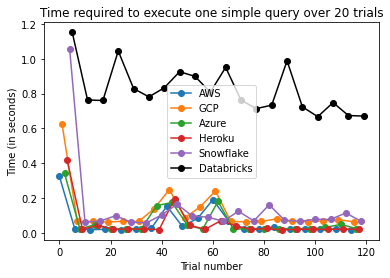

In [5]:
simple_query_1x_plot = plot_results(df = simple_query_results_1x, title = 'Time required to execute one simple query over '+str(simple_query_test_trials_count)+' trials', save_string = 'simple_query_results_1x')